In [41]:
# Kütüphanelerin yüklenmesi
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [59]:
# Veri yükleme
def load_data(file_path):
    data = pd.read_csv(file_path)
    x = data.iloc[:,2:]
    y = data.iloc[:,1:2]
    X = x.values
    Y = y.values
    return X, Y

In [60]:
# Linear Regression
def linear_regression(X, Y):
    lin_reg = LinearRegression()
    lin_reg.fit(X, Y)
    plt.scatter(X, Y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.show()
    print('Linear R2 değeri:', r2_score(Y, lin_reg.predict(X)))
    return lin_reg

In [61]:
# Polynomial Regression
def polynomial_regression(X, Y, degree=4):
    poly_reg = PolynomialFeatures(degree=degree)
    X_poly = poly_reg.fit_transform(X)
    lin_reg2 = LinearRegression()
    lin_reg2.fit(X_poly, Y)
    plt.scatter(X, Y, color='red')
    plt.plot(X, lin_reg2.predict(X_poly), color='blue')
    plt.show()
    print(f'Polynomial (degree {degree}) R2 değeri:', r2_score(Y, lin_reg2.predict(X_poly)))
    return lin_reg2, poly_reg

In [62]:
# Support Vector Regression (SVR)
def svr_regression(X, Y):
    sc1 = StandardScaler()
    X_scaled = sc1.fit_transform(X)
    sc2 = StandardScaler()
    Y_scaled = np.ravel(sc2.fit_transform(Y.reshape(-1, 1)))
    
    svr_reg = SVR(kernel='rbf')
    svr_reg.fit(X_scaled, Y_scaled)
    
    plt.scatter(X_scaled, Y_scaled, color='red')
    plt.plot(X_scaled, svr_reg.predict(X_scaled), color='blue')
    plt.show()
    print('SVR R2 değeri:', r2_score(Y_scaled, svr_reg.predict(X_scaled)))
    return svr_reg, sc1, sc2

In [63]:
# Decision Tree Regression
def decision_tree_regression(X, Y):
    dt_reg = DecisionTreeRegressor(random_state=0)
    dt_reg.fit(X, Y)
    plt.scatter(X, Y, color='red')
    plt.plot(X, dt_reg.predict(X), color='blue')
    plt.show()
    print('Decision Tree R2 değeri:', r2_score(Y, dt_reg.predict(X)))
    return dt_reg

In [64]:
# Random Forest Regression
def random_forest_regression(X, Y, n_estimators=10):
    rf_reg = RandomForestRegressor(n_estimators=n_estimators, random_state=0)
    rf_reg.fit(X, Y.ravel())
    
    plt.scatter(X, Y, color='red')
    plt.plot(X, rf_reg.predict(X), color='blue')
    plt.show()
    print('Random Forest R2 değeri:', r2_score(Y, rf_reg.predict(X)))
    return rf_reg

In [65]:
# Tahminler
def make_predictions(model, X, transformer=None):
    if transformer:
        X = transformer.transform(X)
    prediction = model.predict(X)
    return prediction

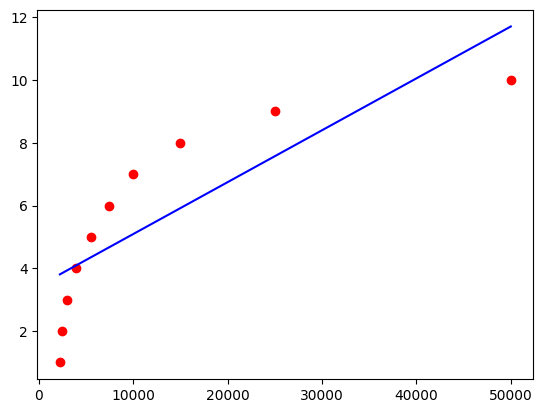

Linear R2 değeri: 0.6690412331929894


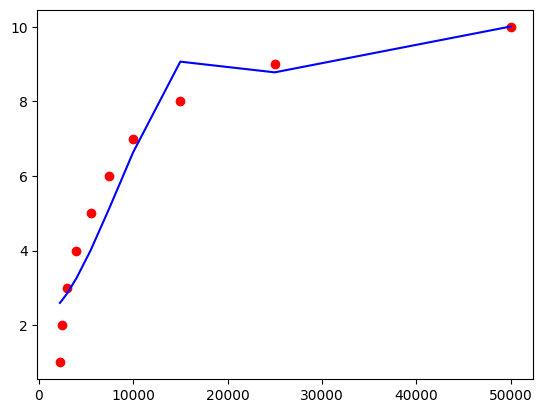

Polynomial (degree 4) R2 değeri: 0.9196962317304457


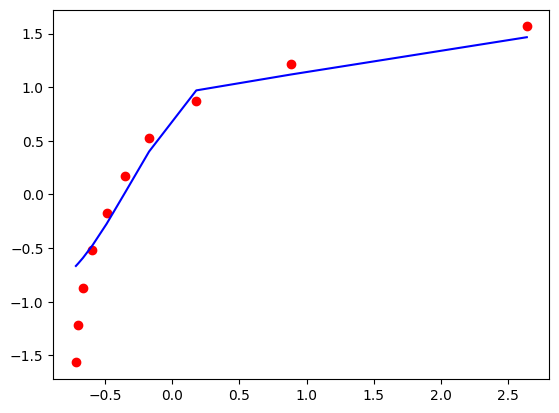

SVR R2 değeri: 0.8700653551504899


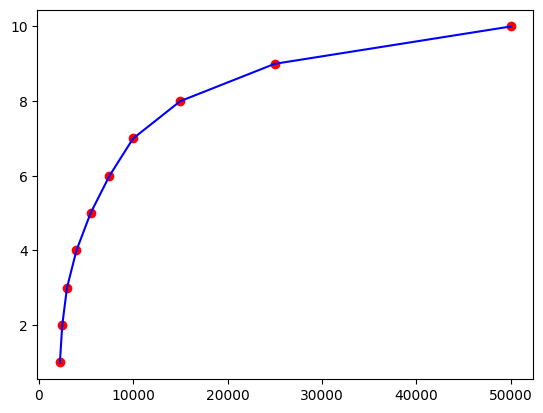

Decision Tree R2 değeri: 1.0


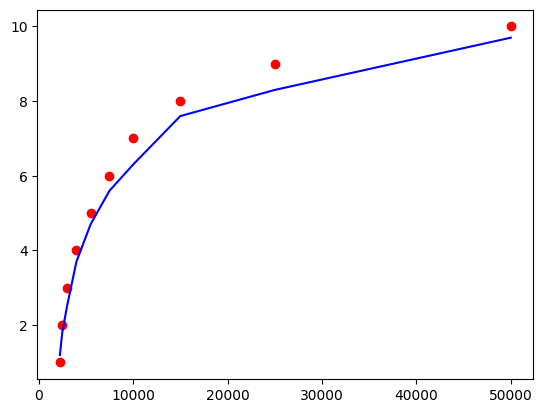

Random Forest R2 değeri: 0.9769696969696969


In [66]:
# Veri dosyasını yükleme
X, Y = load_data('../data/maaslar.csv')

# Linear Regression
linear_model = linear_regression(X, Y)

# Polynomial Regression
poly_model, poly_transformer = polynomial_regression(X, Y, degree=4)

# Support Vector Regression (SVR)
svr_model, scaler_X, scaler_Y = svr_regression(X, Y)

# Decision Tree Regression
dt_model = decision_tree_regression(X, Y)

# Random Forest Regression
rf_model = random_forest_regression(X, Y)

In [68]:
# Özet R2 değerleri
print('-----------------------')
print('Linear R2 değeri:', r2_score(Y, linear_model.predict(X)))
print('Polynomial R2 değeri:', r2_score(Y, poly_model.predict(poly_transformer.fit_transform(X))))
print('SVR R2 değeri:', r2_score(
    scaler_Y.inverse_transform(Y.reshape(-1,1)), 
    svr_model.predict(scaler_X.transform(X)).reshape(-1,1)
))
print('Decision Tree R2 değeri:', r2_score(Y, dt_model.predict(X)))
print('Random Forest R2 değeri:', r2_score(Y, rf_model.predict(X)))

-----------------------
Linear R2 değeri: 0.6690412331929894
Polynomial R2 değeri: 0.9196962317304457
SVR R2 değeri: -6.411496321865883
Decision Tree R2 değeri: 1.0
Random Forest R2 değeri: 0.9769696969696969
